In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/SOP-ALZ LINGUISTICS/Datasets")

## Hyperparameter tuning for classifiers (both multi-class & binary) and finding feature importance for each model.

For binary classification, we have the following 2 categories - Probable AD and Control, and for multiclass classification we have all 6 categories that were there in the dataset.

In [ ]:
df1 = pd.read_csv('train2.csv')       # Loading the last saved csv file that had the final preprocessed data

In [ ]:
# We will use 2 dataframes, one for Binary and another for Multiclass classification

df_binary = df1.copy()
df_multiclass = df1.copy()
df_binary = df_binary[df_binary["Group"] != "MCI"]
df_binary = df_binary[df_binary["Group"] != "Vascular"]
df_binary = df_binary[df_binary["Group"] != "Memory"]
df_binary = df_binary[df_binary["Group"] != "PossibleAD"]

print("\nBinary:")                    # Class distribution for binary classification
df_binary.Group.value_counts()



Binary:


ProbableAD    762
Control       243
Name: Group, dtype: int64

In [ ]:
print("\nMulticlass:")              # Class distribution for multi-class classification
df_multiclass.Group.value_counts()


Multiclass:


ProbableAD    762
Control       243
MCI           162
PossibleAD     68
Vascular       20
Memory         12
Name: Group, dtype: int64

### Binary Classification 

In [ ]:
X = df_binary.drop(columns = ['Group'])
y = df_binary.Group

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
# Importing all things that would be required subsequently

from sklearn.model_selection import GridSearchCV          # for hyperparameter tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, accuracy_score, log_loss, plot_confusion_matrix

#### Decision Tree

In [ ]:

parameters = {'min_samples_split': np.linspace(0, 0.1, 100), 'max_depth': [i for i in range(7, 10)]}
dtc_bin = DecisionTreeClassifier(random_state = 12)

clf1 = GridSearchCV(dtc_bin, parameters, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
result = clf1.fit(scaled_X_train, y_train.ravel())
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 742 tasks      | elapsed:    6.7s


Best: 0.890543 using {'max_depth': 9, 'min_samples_split': 0.00505050505050505}


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   12.6s finished


In [ ]:
y_pred = clf1.predict(scaled_X_test)

In [ ]:
x = (y_pred == y_test.values).sum()
print(x, 'Correct out of', len(y_pred))
print('Accuracy: ', x/len(y_pred))

172 Correct out of 201
Accuracy:  0.8557213930348259


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Micro Precision: 0.86
Micro Recall: 0.86
Micro F1-score: 0.86

Macro Precision: 0.78
Macro Recall: 0.78
Macro F1-score: 0.78

Weighted Precision: 0.86
Weighted Recall: 0.86
Weighted F1-score: 0.86


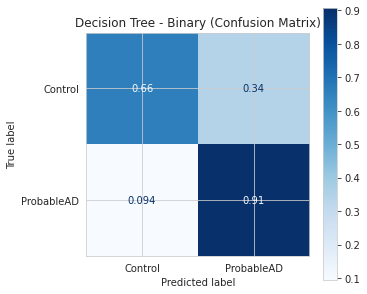

In [ ]:
# plotting confusion matrix for decision tree

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(clf1, scaled_X_test, y_test,  normalize = 'true', cmap=plt.cm.Blues, ax = ax)
plt.title("Decision Tree - Binary (Confusion Matrix)")
plt.show()

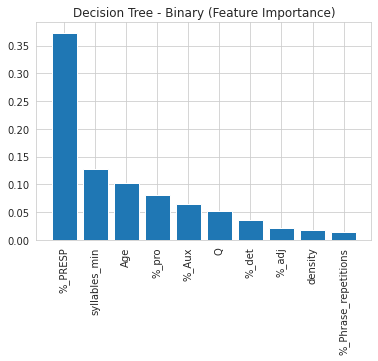

In [ ]:
# plotting feature importance chart for decision tree

importance = clf1.best_estimator_.feature_importances_
indices = np.flip(np.argsort(importance)[-10:])
plt.bar(X.columns[indices], importance[indices])
plt.xticks(rotation = 90)
plt.title("Decision Tree - Binary (Feature Importance)")
plt.show()

In [ ]:
dectree_bin = clf1
filename_model = []
filename_model.append("dectree_bin")

#### Random Forest

In [ ]:
parameters = {'n_estimators': [i*10 for i in range(20, 26)], 'min_samples_split': np.linspace(0, 0.1, 10), 'max_depth': [i for i in range(5, 10)]}

rfc_bin = RandomForestClassifier(random_state = 12)
clf2 = GridSearchCV(rfc_bin, parameters, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
result = clf2.fit(scaled_X_train, y_train.ravel())
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  8.9min finished


Best: 0.936592 using {'max_depth': 8, 'min_samples_split': 0.022222222222222223, 'n_estimators': 240}


In [ ]:
y_pred = clf2.predict(scaled_X_test)

In [ ]:
x = (y_pred == y_test.values).sum()
print(x, 'Correct out of', len(y_pred))
print('Accuracy: ', x/len(y_pred))

173 Correct out of 201
Accuracy:  0.8606965174129353


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Micro Precision: 0.86
Micro Recall: 0.86
Micro F1-score: 0.86

Macro Precision: 0.79
Macro Recall: 0.75
Macro F1-score: 0.77

Weighted Precision: 0.85
Weighted Recall: 0.86
Weighted F1-score: 0.85


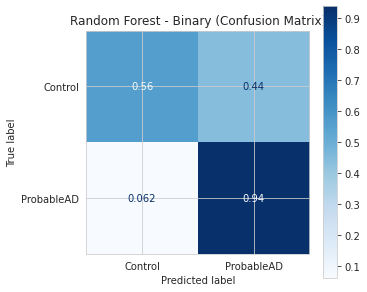

In [ ]:
# plotting confusion matrix for random forest

fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(clf2, scaled_X_test, y_test, normalize = 'true', cmap=plt.cm.Blues, ax = ax)
plt.title("Random Forest - Binary (Confusion Matrix)")
plt.show()

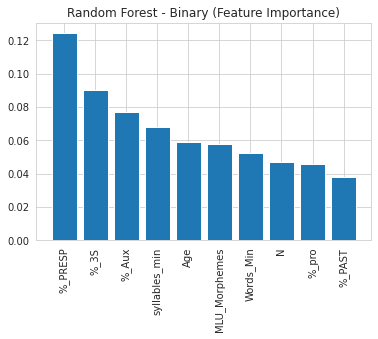

In [ ]:
# plotting feature importance for random forest

importance = clf2.best_estimator_.feature_importances_
indices = np.flip(np.argsort(importance)[-10:])
plt.bar(X.columns[indices], importance[indices])
plt.xticks(rotation = 90)
plt.title("Random Forest - Binary (Feature Importance)")
plt.show()

In [ ]:
randforest_bin = clf2
filename_model.append("randforest_bin")

#### XGB Classifier

In [ ]:
parameters = {'n_estimators': [i*10 for i in range(5, 11)], 'max_depth': [2*i for i in range(1, 5)], 'colsample_bytree': [0.01*i for i in range(60, 70)]}
xgb_bin = XGBClassifier(seed = 12)
clf3 = GridSearchCV(xgb_bin, parameters, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
result = clf3.fit(scaled_X_train, y_train.ravel())
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1152 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.9min finished


Best: 0.941553 using {'colsample_bytree': 0.62, 'max_depth': 6, 'n_estimators': 90}


In [ ]:
clf3 = XGBClassifier(colsample_bytree= 0.65, max_depth= 2, n_estimators= 90)
clf3.fit(scaled_X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=90, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = clf3.predict(scaled_X_test)

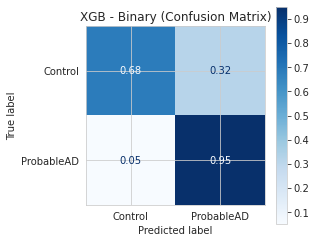

In [ ]:
# plotting confusion matrix for XGBClassifier

fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(clf3, scaled_X_test, y_test,  normalize = 'true', cmap=plt.cm.Blues, ax = ax)
plt.title("XGB - Binary (Confusion Matrix)")
plt.show()

In [ ]:
x = (y_pred == y_test.values).sum()
print(x, 'Correct out of', len(y_pred))
print('Accuracy: ', x/len(y_pred))

180 Correct out of 201
Accuracy:  0.8955223880597015


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.85
Macro Recall: 0.82
Macro F1-score: 0.83

Weighted Precision: 0.89
Weighted Recall: 0.90
Weighted F1-score: 0.89


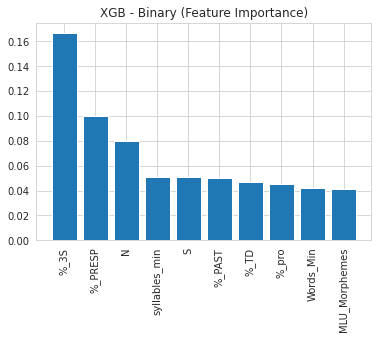

In [ ]:
# plotting feature importance for XGBClassifier

importance = clf3.feature_importances_
indices = np.flip(np.argsort(importance)[-10:])
plt.bar(X.columns[indices], importance[indices])
plt.xticks(rotation = 90)
plt.title("XGB - Binary (Feature Importance)")
plt.show()

In [ ]:
XGB_bin = clf3
filename_model.append("XGB_bin")

#### Support Vector Classifier

In [ ]:
parameters = {'C': np.linspace(7, 15, 100), 'kernel': ('poly', 'rbf', 'sigmoid')}
svc_bin = SVC(random_state = 12)
clf4 = GridSearchCV(svc_bin, parameters, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
result = clf4.fit(scaled_X_train, y_train.ravel())
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:   17.1s


Best: 0.927888 using {'C': 11.202020202020202, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   22.7s finished


In [ ]:
y_pred = clf4.predict(scaled_X_test)

In [ ]:
x = (y_pred == y_test.values).sum()
print(x, 'Correct out of', len(y_pred))
print('Accuracy: ', x/len(y_pred))

181 Correct out of 201
Accuracy:  0.900497512437811


In [ ]:
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.85
Macro Recall: 0.85
Macro F1-score: 0.85

Weighted Precision: 0.90
Weighted Recall: 0.90
Weighted F1-score: 0.90


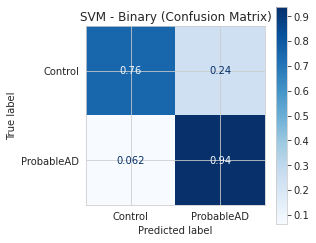

In [ ]:
# plotting confusion matrix for SVC

fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(clf4, scaled_X_test, y_test,  normalize = 'true', cmap=plt.cm.Blues, ax = ax)
plt.title("SVM - Binary (Confusion Matrix)")
plt.show()

#### K-Nearest Neighbours Classifier

In [ ]:
col_names=df_binary.columns.tolist()

x_colnames=col_names.copy()
x_colnames.remove('Group')

x=df_binary.loc[:, x_colnames].values
y=df_binary.loc[:,[col_names[2]]].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

print(x_train.shape, y_train.shape)

(804, 49) (804, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_bin = KNeighborsClassifier(n_neighbors=10)
knn_bin.fit(x_train, y_train)

y_pred = knn_bin.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Control       0.66      0.93      0.77        45
  ProbableAD       0.98      0.86      0.91       156

    accuracy                           0.88       201
   macro avg       0.82      0.90      0.84       201
weighted avg       0.91      0.88      0.88       201



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Micro Precision: 0.88
Micro Recall: 0.88
Micro F1-score: 0.88

Macro Precision: 0.82
Macro Recall: 0.90
Macro F1-score: 0.84

Weighted Precision: 0.91
Weighted Recall: 0.88
Weighted F1-score: 0.88


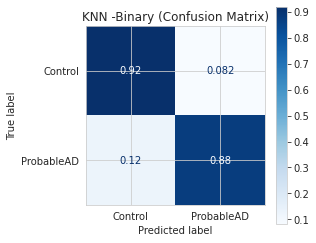

In [ ]:
# plotting confusion matrix for KNN classifier

fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(knn_bin, x_test, y_test, normalize = 'true', cmap=plt.cm.Blues, ax = ax)
plt.title("KNN -Binary (Confusion Matrix)")
plt.show()

Artificial Neural Networks (pending)

### Multiclass Classification



In [ ]:
X = df_multiclass.drop(columns = ['Group'])
y = df_multiclass.Group

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Decision Tree


In [ ]:
parameters = {'min_samples_split': np.linspace(0, 0.1, 100), 'max_depth': [3, 4, 5, 6]}
dtc_mul = DecisionTreeClassifier(random_state = 12)

clf12 = GridSearchCV(dtc_mul, parameters, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
result = clf12.fit(scaled_X_train, y_train.ravel())
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 742 tasks      | elapsed:    6.2s


Best: 0.699937 using {'max_depth': 5, 'min_samples_split': 0.03838383838383838}


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   18.4s finished


In [ ]:
y_pred = clf12.predict(scaled_X_test)

In [ ]:
x = (y_pred == y_test.values).sum()    # Best: 0.699937 using {'max_depth': 5, 'min_samples_split': 0.03903903903903904}
print(x, 'Correct out of', len(y_pred))
print('Accuracy: ', x/len(y_pred))

173 Correct out of 254
Accuracy:  0.6811023622047244


In [ ]:
from sklearn.metrics import precision_score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)

Micro-averaged precision score: 0.68
Macro-averaged precision score: 0.33
Per-class precision score: [0.76595745 0.26829268 0.         0.09090909 0.85034014 0.        ]


In [ ]:
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Micro Precision: 0.68
Micro Recall: 0.68
Micro F1-score: 0.68

Macro Precision: 0.50
Macro Recall: 0.33
Macro F1-score: 0.33

Weighted Precision: 0.69
Weighted Recall: 0.68
Weighted F1-score: 0.64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

Weighted Precision: 0.69
Weighted Recall: 0.68
Weighted F1-score: 0.64

Accuracy: 0.6811



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


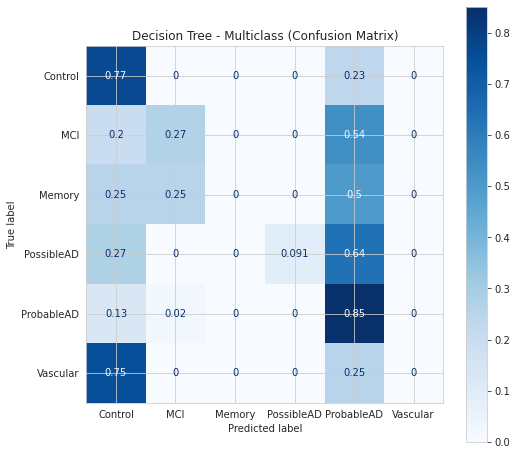

In [ ]:
# plotting confusion matrix for decision tree

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(clf12, scaled_X_test, y_test,  normalize = 'true', cmap=plt.cm.Blues, ax = ax)
plt.title("Decision Tree - Multiclass (Confusion Matrix)")
plt.show()

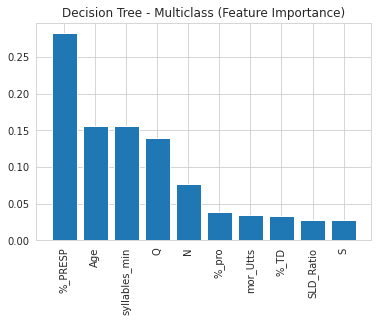

In [ ]:
# plotting feature importance for decision tree

importance = clf12.best_estimator_.feature_importances_
indices = np.flip(np.argsort(importance)[-10:])
plt.bar(X.columns[indices], importance[indices])
plt.xticks(rotation = 90)
plt.title("Decision Tree - Multiclass (Feature Importance)")
plt.show()

In [ ]:
dectree_mul = clf12
filename_model.append("dectree_mul")
filename_model

['dectree_bin',
 'randforest_bin',
 'randforest_bin',
 'XGB_bin',
 'SVM_bin',
 'XGB_bin',
 'knn_bin',
 'dectree_mul']

In [ ]:
filename_model.pop(3)
filename_model

['dectree_bin',
 'randforest_bin',
 'randforest_bin',
 'SVM_bin',
 'XGB_bin',
 'knn_bin',
 'dectree_mul']

#### Random Forest

In [ ]:
parameters = {'n_estimators': [i*10 for i in range(1, 5)], 'min_samples_split': np.linspace(0, 0.2, 20), 'max_depth': [i for i in range(14, 20)]}
rfc_mul = RandomForestClassifier(random_state = 12)

clf2x = GridSearchCV(rfc_mul, parameters, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
result = clf2x.fit(scaled_X_train, y_train.ravel())
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 1116 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  1.6min


Best: 0.752246 using {'max_depth': 16, 'min_samples_split': 0.010526315789473684, 'n_estimators': 20}


[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  2.1min finished


In [ ]:
y_pred = clf2x.predict(scaled_X_test)

In [ ]:
x = (y_pred == y_test.values).sum()
print(x, 'Correct out of', len(y_pred))
print('Accuracy: ', x/len(y_pred))

179 Correct out of 254
Accuracy:  0.7047244094488189


In [ ]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

Weighted Precision: 0.63
Weighted Recall: 0.70
Weighted F1-score: 0.64

Accuracy: 0.7047



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


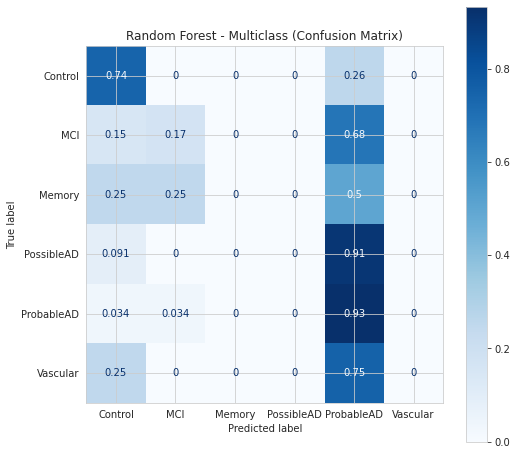

In [ ]:
# plotting confusion matrix for random forest

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(clf2x, scaled_X_test, y_test,  normalize = 'true', cmap=plt.cm.Blues, ax = ax)
plt.title("Random Forest - Multiclass (Confusion Matrix)")
plt.show()

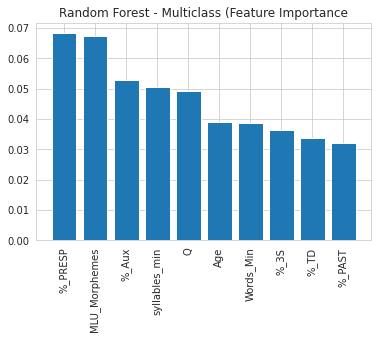

In [ ]:
# plotting feature importance for random forest

importance = clf2x.best_estimator_.feature_importances_
indices = np.flip(np.argsort(importance)[-10:])
plt.bar(X.columns[indices], importance[indices])
plt.xticks(rotation = 90)
plt.title("Random Forest - Multiclass (Feature Importance")
plt.show()

In [ ]:
randforest_mul = clf2x
filename_model.append("randforest_mul")

#### XGB Classifier

In [ ]:
parameters = {'n_estimators': [i*10 for i in range(5, 10)], 'max_depth': [2*i for i in range(1, 5)], 'colsample_bytree': [0.45, 0.5, 0.55, 0.6, 0.65]}
xgb_mul = XGBClassifier(seed = 12)

clf3x = GridSearchCV(xgb_mul, parameters, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
result = clf3x.fit(scaled_X_train, y_train.ravel())
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.1min finished


Best: 0.798625 using {'colsample_bytree': 0.6, 'max_depth': 4, 'n_estimators': 80}


In [ ]:
y_pred = clf3x.predict(scaled_X_test)


In [ ]:
x = (y_pred == y_test.values).sum()
print(x, 'Correct out of', len(y_pred))
print('Accuracy: ', x/len(y_pred))

192 Correct out of 254
Accuracy:  0.7559055118110236


In [ ]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

Weighted Precision: 0.76
Weighted Recall: 0.76
Weighted F1-score: 0.73

Accuracy: 0.7559



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


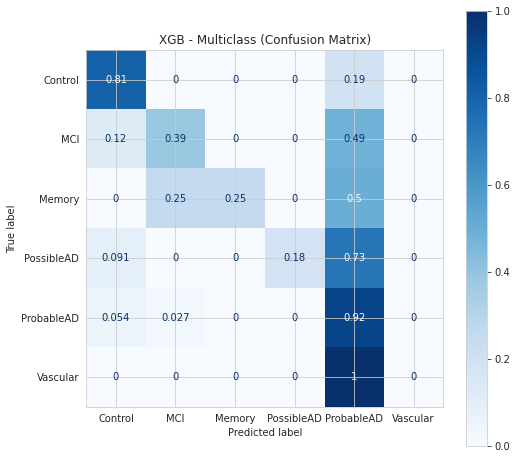

In [ ]:
# plotting confusion matrix for XGBClassifier

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(clf3x, scaled_X_test, y_test,  normalize = 'true', cmap=plt.cm.Blues, ax = ax)
plt.title("XGB - Multiclass (Confusion Matrix)")
plt.show()

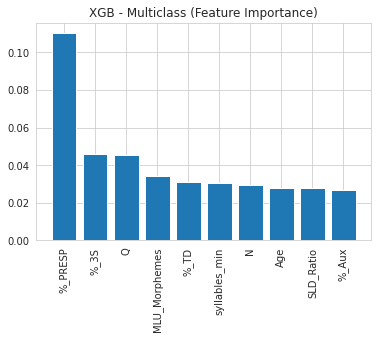

In [ ]:
# plotting feature importance for XGBClassifier

importance = clf3x.best_estimator_.feature_importances_
indices = np.flip(np.argsort(importance)[-10:])
plt.bar(X.columns[indices], importance[indices])
plt.xticks(rotation = 90)
plt.title("XGB - Multiclass (Feature Importance)")
plt.show()

In [ ]:
XGB_mul = clf3x
filename_model.append("XGB_mul")

#### Support Vector Classifier

In [ ]:
parameters = {'C': np.linspace(0.5, 5, 60), 'kernel': ('poly', 'rbf', 'sigmoid')}
svc_mul = SVC(random_state = 12)

clf4x = GridSearchCV(svc_mul, parameters, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
result = clf4x.fit(scaled_X_train, y_train.ravel())
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 564 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   51.6s


Best: 0.741394 using {'C': 1.5677966101694916, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   52.2s finished


In [ ]:
y_pred = clf4x.predict(scaled_X_test)
x = (y_pred == y_test.values).sum()
print(x, 'Correct out of', len(y_pred))
print('Accuracy: ', x/len(y_pred))

179 Correct out of 254
Accuracy:  0.7047244094488189


In [ ]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

Weighted Precision: 0.64
Weighted Recall: 0.70
Weighted F1-score: 0.65

Accuracy: 0.7047



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


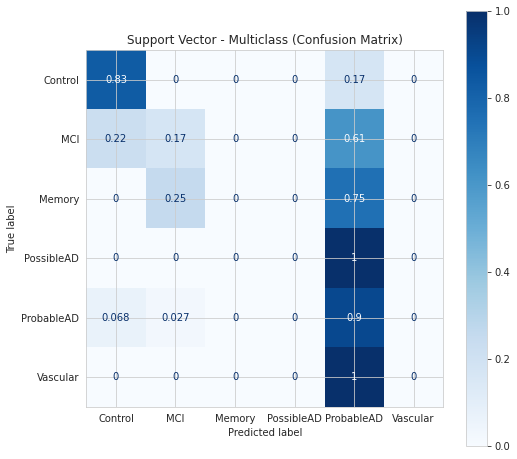

In [ ]:
# plotting confusion matrix for SVC

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(clf4x, scaled_X_test, y_test,  normalize = 'true', cmap=plt.cm.Blues, ax = ax)
plt.title("Support Vector - Multiclass (Confusion Matrix)")
plt.show()

In [ ]:
SVM_mul = clf4x
filename_model.append("SVM_mul")

In [ ]:
#have done model saving till here
from joblib import dump, load
os.chdir("/content/drive/MyDrive/SOP-ALZ LINGUISTICS/Datasets/Models")
#clf = load('filename.joblib')
for i in filename_model:
  dump(i, i+'.joblib')

In [ ]:
os.chdir("/content/drive/MyDrive/SOP-ALZ LINGUISTICS/Datasets/Models")

In [ ]:
from joblib import dump, load
fnames = []
for a,b,i in os.walk("/content/drive/MyDrive/SOP-ALZ LINGUISTICS/Datasets/Models"):
  fnames.append(i)

In [ ]:
models = []
fnames
#for i in fnames[0]:
  #models.append(load(i))

[['dectree_bin.joblib',
  'randforest_bin.joblib',
  'XGB_bin.joblib',
  'knn_bin.joblib',
  'randforest_mul.joblib',
  'XGB_mul.joblib',
  'SVM_mul.joblib',
  'SVM_bin.joblib',
  'dectree_mul.joblib']]

#### K-Nearest Neighbour (KNN) Classifier

In [ ]:
col_names=df_multiclass.columns.tolist()

x_colnames=col_names.copy()
x_colnames.remove('Group')



x=df_multiclass.loc[:, x_colnames].values
y=df_multiclass.loc[:,[col_names[2]]].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

print(x_train.shape, y_train.shape)

(1013, 49) (1013, 1)


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
knn_mul = KNeighborsClassifier(n_neighbors=10)
knn_mul.fit(x_train, y_train)

y_pred = knn_mul.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     Control       0.63      0.93      0.75        55
         MCI       0.60      0.18      0.28        33
      Memory       0.00      0.00      0.00         6
  PossibleAD       0.00      0.00      0.00         5
  ProbableAD       0.78      0.83      0.80       152
    Vascular       0.00      0.00      0.00         3

    accuracy                           0.72       254
   macro avg       0.33      0.32      0.31       254
weighted avg       0.68      0.72      0.68       254



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

Weighted Precision: 0.68
Weighted Recall: 0.72
Weighted F1-score: 0.68

Accuracy: 0.7205



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


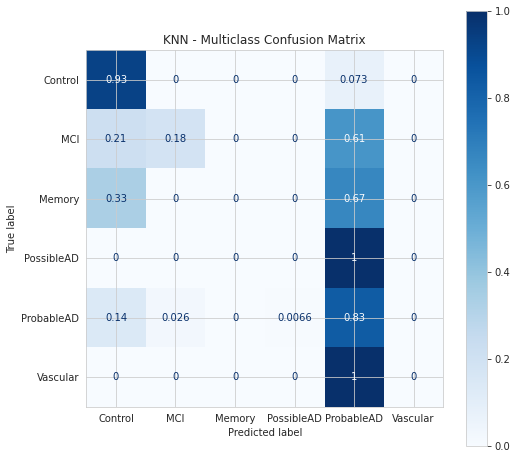

In [ ]:
# plotting confusion matrix for KNN

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(knn_mul, x_test, y_test, normalize = 'true', cmap=plt.cm.Blues, ax = ax)
plt.title("KNN - Multiclass Confusion Matrix")
plt.show()